In [1]:
from mxnet import nd
from time import time

In [2]:
a = nd.ones(shape=1000)
b = nd.ones(shape=1000)

In [3]:
start = time()
c = nd.zeros(shape=1000)
for i in range(1000):
    c[i] = a[i] + b[i]
time() - start

0.28333592414855957

In [4]:
start = time()
d = a + b
time() - start

0.000286102294921875

In [5]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd
import random

In [6]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.3
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [7]:
features[0], labels[0]

(
 [2.2122064 0.7740038]
 <NDArray 2 @cpu(0)>,
 
 [6.1005874]
 <NDArray 1 @cpu(0)>)

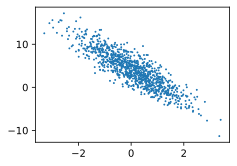

In [8]:
def use_svg_display():
    # 用矢量图表示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 随机下标
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i : min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [10]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 0.7806437   1.1585592 ]
 [ 1.7430508  -0.15937075]
 [ 2.0719576   0.29137844]
 [-2.7565832  -0.8045069 ]
 [ 1.5570954  -1.3122313 ]
 [-1.8043553   0.87395597]
 [ 0.57461417  1.4661262 ]
 [-2.060632    0.3866247 ]
 [ 1.2054669  -0.99645287]
 [-1.8119742   0.07506547]]
<NDArray 10x2 @cpu(0)> 
[ 1.9219415   8.307435    7.4528275   1.5137192  11.867314   -2.2879093
  0.46797353 -1.1286615  10.092634    0.40792054]
<NDArray 10 @cpu(0)>


In [11]:
w = nd.random_normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1, ))

In [12]:
w.attach_grad()
b.attach_grad()

In [13]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [14]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [15]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [16]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()  # 小批量先对模型参数求梯度
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)  # 计算总的loss
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.041403
epoch 2, loss 0.000151
epoch 3, loss 0.000050


In [17]:
true_w, w

([2, -3.4],
 
 [[ 1.999689 ]
  [-3.3995767]]
 <NDArray 2x1 @cpu(0)>)

In [18]:
true_b, b

(4.3,
 
 [4.2997475]
 <NDArray 1 @cpu(0)>)

In [19]:
features[:, 1].asnumpy().shape

(1000,)

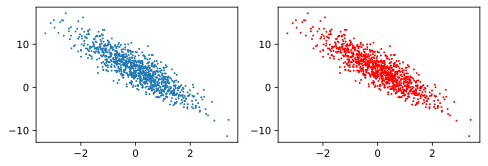

In [21]:
set_figsize(figsize=(8, 2.5))
plt.subplot(1, 2, 1)
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)
plt.subplot(1, 2, 2)
plt.scatter(features[:, 1].asnumpy(), linreg(features, w, b).asnumpy(), 1, c='r')

In [22]:
import d2lzh
help(d2lzh.data_iter)

Help on function data_iter in module d2lzh.utils:

data_iter(batch_size, features, labels)
    Iterate through a data set.



### 简洁实现

In [23]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.3
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [24]:
from mxnet.gluon import data as gdata

batch_size = 10
# 融合训练数据和标签
dataset = gdata.ArrayDataset(features, labels)
data_iter  = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [25]:
for X, y in data_iter:
    print(X, y)
    break


[[ 0.7776928   1.378699  ]
 [ 0.18685596 -1.1161425 ]
 [-1.9620001   2.6894038 ]
 [-0.8785391   0.1232803 ]
 [-0.5309801  -0.84221154]
 [-0.5906247  -0.24511418]
 [-1.307843   -1.0248793 ]
 [ 0.34507698 -0.14198476]
 [-0.85017574  1.5872474 ]
 [-0.10348699 -0.7195109 ]]
<NDArray 10x2 @cpu(0)> 
[ 1.1622475  8.471407  -8.758285   2.110573   6.1032915  3.972853
  5.1625214  5.4886413 -2.7903078  6.5323944]
<NDArray 10 @cpu(0)>


In [26]:
from mxnet.gluon import nn
net = nn.Sequential()

In [27]:
net.add(nn.Dense(1)) # 输出维度为1的全连接层

In [29]:
from mxnet import init
# 初始化参数 均值为0，标准差为0.01的正态分布
net.initialize(init.Normal(sigma=0.01))

In [30]:
from mxnet.gluon import loss as gloss

loss = gloss.L2Loss() # 平方差损失又称L2范数损失

In [31]:
# 定义优化算法
from mxnet import gluon

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [32]:
num_epochs = 3

for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()  # 小批量先对模型参数求梯度
        trainer.step(batch_size)
    train_l = loss(net(features), labels)  # 计算总的loss
    print('epoch %d, loss %f' % (epoch, train_l.mean().asnumpy()))

epoch 1, loss 0.034905
epoch 2, loss 0.000125
epoch 3, loss 0.000050


In [33]:
dense = net[0]
true_w, dense.weight.data()

([2, -3.4],
 
 [[ 2.0003126 -3.4003236]]
 <NDArray 1x2 @cpu(0)>)

In [34]:
true_b, dense.bias.data()

(4.3,
 
 [4.299273]
 <NDArray 1 @cpu(0)>)

In [36]:
dense.weight.grad()


[[-0.0551168   0.00413356]]
<NDArray 1x2 @cpu(0)>